# Exercise 3: Probability and Bayesian Learning


### Make sure that you read and fully understand all the guidelines listed below before you proceed with the exercise.

* HW assignments are a significant part of the learning experience in this course and contribute 50% to your final grade. So, make sure to devote the appropriate time to them.
* **Sharing solutions with someone who is not your submitting partner is strictly prohibited**. This includes reading someone else's code or sharing your code / posting it somewhere.
* Appeals regarding submissions that do not follow the guidelines will not be accepted. 

## Read the following instructions carefully:

### Guidelines for Programming Exercises:

* Complete the required functions in `hw3.py`. Any modifications to this notebook will not be tested by our automated tests.
* Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise can take several minutes when implemented efficiently, but will take much longer otherwise. Unnecessary loops will result in point deductions.
* You are responsible for the correctness of your code. You can add tests to this jupyter notebook to validate your solution. The contents of this jupyter notebook will not be graded or checked.
* You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/), numpy and pandas only. **Do not import anything else.**
* Use `numpy` version 1.15.4 or higher.
* Your code must run without errors. Code that cannot run will not be graded.
* Your code will be tested using automated scripts. So, failure to follow the instructions may lead to test failure, which might significantly affect your grade. 


### Guidlines for Theoretical Exercises
* Your solution should be written or typed and submitted in a separate file `hw3.pdf`.
* If you scan a handwritten solution, make sure that your handwriting is legible and the scan quality is good.
* You are expected to solve the questions analytically and provide a step-by-step solution. 
* It is okay and often recommended to use python to carry out the computations. 
* You may use the lecture slides and previous homework assignments as references, unless explicitly asked to prove a result from class. 

### Submission Guidelines:
* Submit your solutiuon in a zip file that contains: 
  - The `hw3.py` script with your solution to the progamming exercise
  - This notebook with your added tests (this is not checked or graded)
  - The `hw3.pdf` file with your solution to the theoretical exercises.
  
* The name of the zip file should contain your ID(s). For example, `hw3_123456789_987654321.zip` if you submitted in pairs and `hw3_123456789.zip` if you submitted the exercise alone.
* Please use **only a zip** file in your submission.

---
---

## Please sign that you have read and understood the instructions: 

### *** 209276468 ***

---
---

# Part 1: Theoretical Exercise (16 points)
## Maximum Likelihood Estimation and Confidence Intervals

The Poisson distribution is a discrete porbability distribution over the non-negative integers with a single parameter $\lambda>0$ and PMF:
$$
\Pr[X=k] = \frac{\lambda^k e^{-\lambda}}{k!}
$$
This distribution is useful in modeling the number of event occurrences in a fixed time interval when the probability of an event occurrence  does not depend on the time since the last event. The parameter of this distribution, $\lambda$, is the expected number of events in one time interval. As a result, the expectation and variance of a $\mathrm{Pois}(\lambda)$ random variable are both $\lambda$.


Suppose that you have a set of samples $D = \{x_1,\ldots,x_n\}$.
We propose a probability model in which these samples are taken from  $X_1,\ldots,X_n$, which are independent $\mathrm{Pois}(\lambda)$ random variables.

1. Write the **log-likelihood** function of $\lambda$ under $D$. Use natural log here (base $e$).
2. Use the **log-likelihood** function you derived above to find an expression for the maximum likelihood estimator (MLE) $\hat{\lambda}$ of $\lambda$.


We now wish to find an expression for an intervalcontaining $\lambda$ with probability at least $0.95$ under the model we proposed. Namely, a $95\%$ confidence interval (CI) for $\lambda$  (around the estimated $\hat\lambda$) .

3. Consider $\hat{\lambda}$ as a random variable whose randomness stems from the randomness in $X_1,\ldots,X_n$.
Write an expression for the mean $\mathbb E[\hat{\lambda}]$ and the variance $\mathrm{Var}[\hat{\lambda}]$ as a function of $n$ and $\lambda$.

4. Assume that your estimator $\hat{\lambda}$ is asymptotically normal, meaning that its **standardized** value apporaches a normal distribution as the number of data points goes to infinity:
$$
\begin{align}
\frac{\hat{\lambda} - \mathbb E[\hat{\lambda}]}{\sqrt{\mathrm{Var}[\hat{\lambda}]}} \sim \mathcal N(0,1). 
\end{align}
$$
$~~~~~~$ (Note: this is implied by the central limit theorem.)

$~~~~~~$ Under this assumption, write expressions for the lower and upper boundaries of the 95% confidence interval for $\lambda$ around the estimated $\hat\lambda$. Your two expressions should be specified as functions of $\hat\lambda$, $n$, and the inverse Gaussian CDF $\Phi^{-1}(p)$. 

# Part 2: Coding Assignment (84 points)

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. A Poisson Model For The Number of Goals in a Football Match (12 points)

In this question, we will model the number of goals in UFEA Champions League games season 2015-6 using the Poisson distributon. We start by reading the data file and doing some basic preprocessing.

In [66]:
# Loads UEFA Champions League match data from the 2015-2016 season:
df_champs = pd.read_csv("data/champs_2015-6.csv")
# add total goals in match data by parsing the FT (Full Time score) column:
df_champs['totalGoals'] = df_champs['FT'].str.extract("([0-9]+)-").astype(int) + df_champs['FT'].str.extract("-([0-9]+)").astype(int)

# present the first 5 rows of the dataframe with relevant columns:
df_champs.filter(items=['Team 1', 'Team 2', 'Date', 'FT', 'totalGoals']).head()

,Team 1,Team 2,Date,FT,totalGoals
0,Crusaders › NIR (1),Levadia › EST (1),(Tue) 30 Jun 2015 (W26),0-0,0
1,Lincoln Red Imps › GIB (1),FC Santa Coloma › AND (1),(Tue) 30 Jun 2015 (W26),0-0,0
2,Pyunik › ARM (1),S.S. Folgore Falciano Calcio › SMR (1),(Tue) 30 Jun 2015 (W26),2-1,3
3,B36 Torshavn › FRO (1),The New Saints › WAL (1),(Wed) 1 Jul 2015 (W26),1-2,3
4,Levadia › EST (2),Crusaders › NIR (2),(Tue) 7 Jul 2015 (W27),1-1,2


We now plot a histogram of the total number of goals per match.

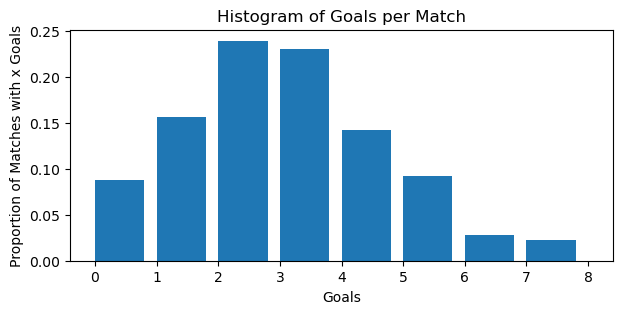

In [67]:
# plot the histogram of goals per match:
max_goals = df_champs['totalGoals'].max()
plt.figure(figsize=(7,3))
plt.hist(df_champs['totalGoals'], bins = np.arange(0, max_goals + 1 ,1), width=0.8, density=True)
plt.xlabel('Goals')
plt.ylabel('Proportion of Matches with x Goals')
plt.title("Histogram of Goals per Match")
plt.show()

### Log of Point Mass (3 points)

Implement the function `poisson_log_pmf` in `hw3.py`.

This function computes the (natural) log of the PMF of a Poisson distribution with a given rate ($\lambda$) for a given event count ($k$) or an array of event counts (in which case the function returns an array of log PMF values). You may use the function `math.factorial` from the `math` library to compute the factorial of a number. 

In [68]:
from hw3 import poisson_log_pmf

### Poisson MLE (3 points)

Implement the function `possion_analytic_mle` in `hw3.py`.

This function computes the MLE for the Poisson rate parameter using the expression you derived for $\hat\lambda$ in question (2) of the theoretical exercise above.



In [69]:
X = df_champs['totalGoals'].values.flatten()
from hw3 import (possion_analytic_mle)
lambda_mle = possion_analytic_mle(X)

### Confidence Interval (3 points)

Implement the function `possion_confidence_interval` in `hw3.py`.

This function computes a $(1-\alpha)$ confidence interval around an estimated $\hat\lambda$ using the expression you derived in question (4) of the theoretical exercise above. You may use the function `norm.ppf` from library `scipy.stats` to compute the inverse of the standard normal CDF function ($\Phi^{-1}$).

In [70]:
from hw3 import (possion_confidence_interval)

[lower_bound005, upper_bound005] = possion_confidence_interval(lambda_mle,X.shape[0], alpha=0.05)
[lower_bound001, upper_bound001] = possion_confidence_interval(lambda_mle,X.shape[0], alpha=0.01)

print(f"95% CI for lambda: ({lower_bound005}, {upper_bound005})")
print(f"99% CI for lambda: ({lower_bound001}, {upper_bound001})")

95% CI for lambda: (2.477395371141786, 2.914309697982638)
99% CI for lambda: (2.408751155380209, 2.9829539137442156)


### Log Likelihood (3 points)

Implement the function `get_poisson_log_likelihoods` in `hw3.py`.

This function computes the log likelihoods of a list of rate values ($\lambda$) given a dataset $X$. Below, we use this function to validate that the MLE you got above indeed corresponds to the maximum log likelihood.

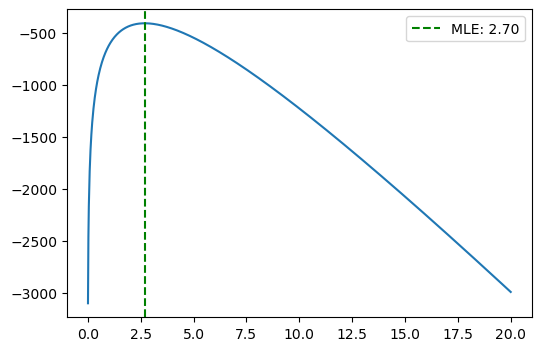

In [71]:
from hw3 import (get_poisson_log_likelihoods)
potential_rates = np.linspace(0.01, 20, num=1000)

plt.figure(figsize=(6,4))
plt.plot(potential_rates, get_poisson_log_likelihoods(X, potential_rates))
plt.axvline(x=lambda_mle, linestyle='--', c='g', label=f"MLE: {lambda_mle:.2f}")
plt.legend()
plt.show()

The code below computes the PMF of a Poisson distribution with the rate you received as MLE and it then compares this PMF to the histogram of goals per game in the dataset. This comparison allows you to visually assess the fit of the (best fit) Poisson model to the data.

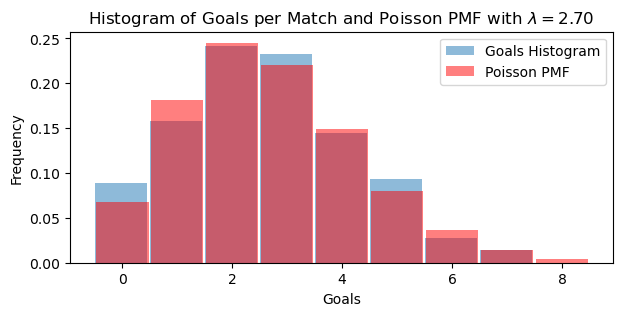

In [72]:
k_vals = np.arange(0, max_goals+1,1)
poisson_pmf = np.exp(poisson_log_pmf(k_vals, lambda_mle))

# align the histogram to the center of the bins:
plt.figure(figsize=(7,3))
plt.hist(X, bins=k_vals-0.5, density=True, align='mid', width=0.95, label='Goals Histogram', alpha=0.5)

plt.bar(k_vals, poisson_pmf, label='Poisson PMF', color='red', width=0.95, alpha=0.5)
plt.legend()

plt.title(rf"Histogram of Goals per Match and Poisson PMF with $\lambda=${lambda_mle:.2f}")
plt.ylabel('Frequency')
plt.xlabel('Goals')
plt.show()


**Food for thought:** It is rare to see more than eight goals per match. In fact, it did not happened in the 2015-6 season of the UEFA Champions League. Can you provide an estimate to the probability that more than eight goals ($\geq 9$) would be scored in one game based on the model you fit to your data?

In [73]:
import math

lambda_mle = 2.70

#compute Poisson PMF(k;λ) for k = 0..8 using our poisson_log_pmf:
k_vals = np.arange(0, 9)   # [0, 1, 2, ..., 8]
log_pmf = poisson_log_pmf(k_vals, lambda_mle)
pmf = np.exp(log_pmf)      # convert back from log‐PMF

#the cumulative probability P(K ≤ 8):
cdf_up_to_8 = np.sum(pmf)

# P(K ≥ 9) = 1 − P(K ≤ 8)
prob_at_least_9 = 1.0 - cdf_up_to_8

print(f"P(K ≥ 9) ≈ {prob_at_least_9:.6f}")

if prob_at_least_9<0.01:
    print(f"getting more than 8 goals is very unlikly. it will occor {math.ceil(prob_at_least_9*1000)} times every 1000 games")




P(K ≥ 9) ≈ 0.001914
getting more than 8 goals is very unlikly. it will occor 2 times every 1000 games


## 2. Conditional independence  (8 points)

Consider the following requirements for the binary random variables $X, Y$ and $C$:  
1. The marginal probabilities of the three variables are specified as follows:  
    * $\Pr[X=0] = 0.3 ~~ ; ~~  \Pr[X=1] = 0.7$
    * $\Pr[Y=0] = 0.3 ~~ ; ~~  \Pr[Y=1] = 0.7$
    * $\Pr[C=0] = 0.5 ~~ ; ~~  \Pr[C=1] = 0.5$
2. $X$ and $Y$ are not (marginally) independent
3. $X$ and $Y$ are conditionaly independent given $C$: $~~X \perp\!\!\!\perp Y\ |\ C$

Rcall that $X$ and $Y$ are conditionaly independent given $C$ if and only if for all $x,y,c$ we have:
$$
Pr[X=x,Y=y|C=c] ~=~ Pr[Y=y|C=c]\ Pr[Y=y|C=c]
$$

Note that $Pr[X=x|C=c]=\frac{Pr[X=x,C=c]}{Pr[C=c]}$, and similarly for the other conditional probabilities.

Define a joint probability distribution for $X, Y$ and $C$ that satisfies these conditions.
This should be done by setting the appropriate values in the python dictionaries in class `conditional_independence` in `hw3.py`.
You should make sure that all the probabilities are valid, meaning that they are non-negative, sum to one,
and that all dictionaries are consistent with one another.

After you do this, implement the member functions `is_X_Y_depndendent` `is_X_Y_given_C_independent` to confirm that requirements (2) and (3) above are satisfied.

In [74]:
from hw3 import conditional_independence

print(conditional_independence().is_X_Y_dependent())
print(conditional_independence().is_X_Y_given_C_independent())

True
True



## 3. A Normal Naive Bayes Classifier (24 points)

### The Randomammal Data

In a faraway land called **Randomistan** there is a rare animal called the **Randomammal**. Scientists in Randomistan observed the randomammals' habitat for 1000 days to try to determine the conditions under which randomammals are active (or not). For each of the 1000 days, the scientists recorded the temperature and the humidity in Randomistan and whether a randomammal was spotted or not.
Thus, our dataset contains two features (**Temperature**, **Humidity**) alongside a binary class label (**Spotted**) for each of the 1000 days in the study.

Let's start off by loading the train and test data into a pandas dataframe and converting them
into numpy arrays. We then visualize the training data using a scatterplot where *x*=Temperature, *y*=Humidity and the class label is represented by color.

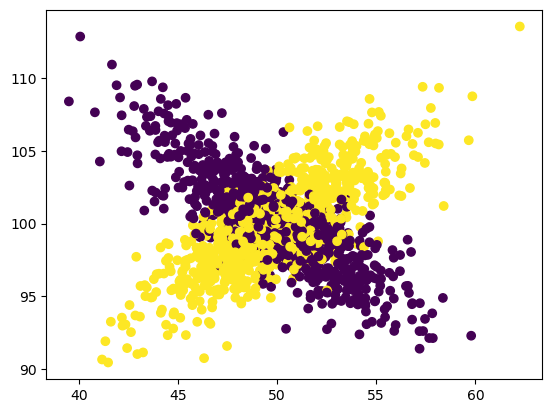

In [75]:
# Load the train and test set into a pandas dataframe and convert them into a numpy array.
# The columns order: ['Temp', 'Humidity', 'Spotted']
train_set = pd.read_csv('data/randomammal_train.csv').values
test_set = pd.read_csv('data/randomammal_test.csv').values

plt.scatter(x=train_set[:, 0], y=train_set[:, 1], c=train_set[:, 2])

### Bob's Naive Bayes Model

The well known randomian scientist **Bob** prefers simple solutions, so he wants to use a Naive Bayes classifier for this problem.
Note that it is unlikely that temperature and humidity are independent, and conditioning on whether a randomammal was spotted or not
on a given day should not make them conditionally independent. However, as we discussed in class, Naive Bayes classifiers can be effective even when the conditional independence assumption is not strictly satisfied. Recall that a Naive Bayes classifier for two features makes the following assumption: 
$$ 
f_{X|Y=y}(x_1,x_2) = f_{X_1|Y=y}(x_1)\ f_{X_2|Y=y}(x_2)
$$

Bob wishes to fit each of the four feature-specific class conditionals, $f_{X_1|Y=0}, f_{X_2|Y=0}, f_{X_1|Y=1}$, and $f_{X_2|Y=1}$,
using univariate normal distributions with different means ($\mu$) and variances ($\sigma^2$).

### Univariate Normal PDF (4 points)

Implement the function `normal_pdf` in `hw3.py`. 

This function computes the PDF of a univariate normal distribution with given mean and standard deviation at a given value ($x$) according to the expression:
$$
f(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot e ^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

In [76]:
from hw3 import normal_pdf

# At the mean, x = mean, the PDF should be 1/(std*sqrt(2*pi)).
print(normal_pdf(0.0, mean=0.0, std=1.0))  
# Expected: 1/sqrt(2*pi) ≈ 0.39894228

m=5
# Symmetry: PDF(μ + d) == PDF(μ - d)
print(normal_pdf(m + 2.0, mean=m, std=3.0), normal_pdf(m - 2.0, mean=m, std=3.0))

# If x is a vector, you get a vector:
xs = np.array([-1.0, 0.0, 1.0])
print(normal_pdf(xs, mean=0.0, std=1.0))
# Expected: [≈0.24197, 0.39894, 0.24197]


0.3989422804014327
0.10648266850745075 0.10648266850745075
[0.24197072 0.39894228 0.24197072]


### The Class-specific Distributions (15 points)

Implement the `NaiveNormalClassDistribution` class in `hw3.py`.

The constructor of this class receives a dataset and a class label (0 or 1 in our case, but your code should accept any value).
It then creates an object that can compute the joint probability of the specified class label with a given input ($x$).
To do so, the constructor has to fit a separate normal distribution to each of the features in the data
(our data has two features, but your code should not assume this).

The class has three member functions, `get_prior`, `get_instance_likelihood`, and `get_instance_joint_prob`,
which compute the various probabilities involved in classification of a given input sample. 

In [77]:
from hw3 import NaiveNormalClassDistribution

# Build the a NaiveNormalClassDistribution for each class label
naive_normal_CD_0 = NaiveNormalClassDistribution(train_set, 0)
naive_normal_CD_1 = NaiveNormalClassDistribution(train_set, 1)

x_test = test_set[1, :-1]

print(f"Test point: {x_test} has joint probability {naive_normal_CD_0.get_instance_joint_prob(x_test):.4f} for class 0")
print(f"Test point: {x_test} has joint probability {naive_normal_CD_1.get_instance_joint_prob(x_test):.4f} for class 1")

Test point: [43.04295116 90.82977687] has joint probability 0.0000 for class 0
Test point: [43.04295116 90.82977687] has joint probability 0.0000 for class 1


### The MAP Classifier (5 points)

Implement the `MAPClassifier` class in `hw3.py`.

This class holds a `ClassDistribution` object  (`NaiveNormal` here and `MultiNormal` later) for each class label (0 and 1).
These objects are used to predict class labels ($y$) for input instances ($x$) using the maximum a-posteriori (MAP) rule. This class has a constructor and one member function `predict`.

In [78]:
from hw3 import MAPClassifier
naive_normal_classifier = MAPClassifier(naive_normal_CD_0, naive_normal_CD_1)

print(f"MAP Classifier predicts class {naive_normal_classifier.predict(x_test)} for test point {x_test}")

MAP Classifier predicts class 0 for test point [43.04295116 90.82977687]


## 4. A Bivariate Normal Classifier (20 points)

**Alice**, Bob's colleague, suspects that Bob's Naive Bayes classifier might underperform on the randomammal data. 
She proposes using a Bayes classifier that uses a (general) bivariate normal distribution for the class conditional distributions.
This approach adds one parameter to each of the two class conditionals corresponding to the covariance between the two features (given the class label). Alice argues that there is sufficient data to support estimation of the two additional parameters without overfitting.

### Multivariate Normal PDF (5 points)

Implement the function `multi_normal_pdf` in `hw3.py`. 

This function computes the PDF of a multivariate normal distribution with given mean vector ($\mu\in \mathbb{R}^d$) and a covariance matrix ($\Sigma\in \mathbb{R}^{d\times d}$) at a given value ($x\in \mathbb{R}^d$) according to the following function:
$$
(2\pi)^{-\frac{d}{2}} \mathrm{det}(\Sigma )^{-\frac{1}{2}} \cdot e ^{-\frac{1}{2}(x-\mu)^T \Sigma ^ {-1} (x - \mu) }
$$

In [79]:
from hw3 import multi_normal_pdf

### The Class-specific Distributions (15 points)

Implement the `MultiNormalClassDistribution` class in `hw3.py`.

This class is similar to the `NaiveNormalClassDistribution` class, in that its constructor receives a dataset and a class label,
and it creates an object that can compute the joint probability of the specified class label with a given input ($x$).
In this class, this is done by fitting a multi-variate normal distribution to all features jointly
(our data has two features, but your code should not assume this).
The covariance matrix should be estimated using the *sample covariance matrix* (see lecture slides).

Similar to the `NaiveNormalClassDistribution` class, the class has three member functions,
`get_prior`, `get_instance_likelihood`, and `get_instance_joint_prob`,
which compute the various probabilities involved in classification of a given input sample.

The code below fits bivariate normal distributions to each class label and then uses them to construct a MAP classifier object.

In [80]:
from hw3 import MultiNormalClassDistribution

# Build the a MultiNormalClassDistribution for each class.
multi_normal_CD_0 = MultiNormalClassDistribution(train_set, 0)
multi_normal_CD_1 = MultiNormalClassDistribution(train_set, 1)
# train_set
# Use these distributions to build a MAPClassifier.
multi_normal_classifier = MAPClassifier(multi_normal_CD_0, multi_normal_CD_1)

print(f"Test point: {x_test} has joint probability {multi_normal_CD_0.get_instance_joint_prob(x_test):.4f} for class 0")
print(f"Test point: {x_test} has joint probability {multi_normal_CD_1.get_instance_joint_prob(x_test):.4f} for class 1")
print(f"MAP Classifier predicts class {multi_normal_classifier.predict(x_test)} for test point {x_test}")

Test point: [43.04295116 90.82977687] has joint probability 0.0000 for class 0
Test point: [43.04295116 90.82977687] has joint probability 0.0002 for class 1
MAP Classifier predicts class 1 for test point [43.04295116 90.82977687]


## 5. Evaluate Alice's And Bob's Models (5 points)

Implement the function `compute_accuracy` in `hw3.py`. 

This function computes the accuracy of a given (MAP) classifier on a (test) dataset.

The code below applies this function to the two MAP classifiers you implemented based on Bob's and Allice's approaches on the same test data.
It then plots the estiamted accuracy of each classifier in a bar plot.

Text(0, 0.5, 'Accuracy')

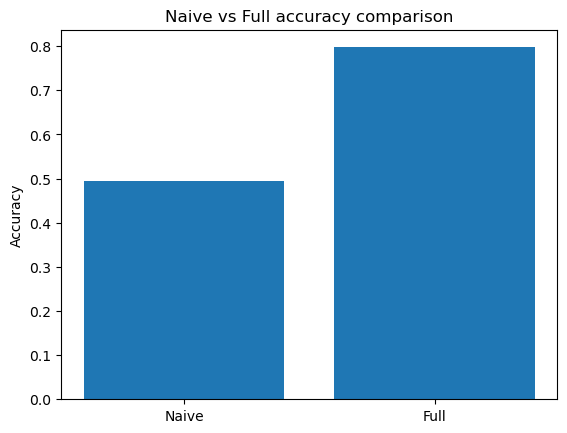

In [81]:
from hw3 import compute_accuracy

# Compute the accuracy of Bob's and Alice's models
naive_accuracy = compute_accuracy(test_set, naive_normal_classifier)
full_accuracy = compute_accuracy(test_set, multi_normal_classifier)
naive_accuracy, full_accuracy

# Bar plot of accuracy of each model side by side.
plt.bar(x=['Naive', 'Full'], height=[naive_accuracy, full_accuracy])
plt.title("Naive vs Full accuracy comparison")
plt.ylabel("Accuracy")

## Sanity-Check: Bob vs Alice MAP Classifiers

Below we’ll run three quick checks to verify our implementations:
1. **Single-point joint-probability & prediction**  
2. **Decision-boundary grid comparison**  
3. **Overall test-set accuracy**

### 1. Single-Point Joint-Probability & MAP Prediction

Compute and compare  
- Bob’s P(Y=0,X) vs P(Y=1,X)  
- Alice’s P(Y=0,X) vs P(Y=1,X)  
and see which class each predicts for our test point.

In [82]:
# 0) Instantiate Bob’s Naïve Bayes distributions and classifier
bob_cd0 = NaiveNormalClassDistribution(train_set, 0)
bob_cd1 = NaiveNormalClassDistribution(train_set, 1)
bob_clf = MAPClassifier(bob_cd0, bob_cd1)

# 0) Instantiate Alice’s Bivariate distributions and classifier
alice_cd0 = MultiNormalClassDistribution(train_set, 0)
alice_cd1 = MultiNormalClassDistribution(train_set, 1)
alice_clf = MAPClassifier(alice_cd0, alice_cd1)


In [83]:
# 1) Single-Point Comparison
x_test = test_set[1, :-1]
y_true = test_set[1,  -1]

for name, clf, cd0, cd1 in [
    ("Bobs Naive Bayes", bob_clf,   bob_cd0,   bob_cd1),
    ("Alices Bivariate", alice_clf, alice_cd0, alice_cd1),
]:
    j0   = cd0.get_instance_joint_prob(x_test)
    j1   = cd1.get_instance_joint_prob(x_test)
    pred = clf.predict(x_test)
    print(f"{name}:")
    print(f"  P(Y=0, X) = {j0:.5e},  P(Y=1, X) = {j1:.5e}")
    print(f"  → predict {pred} (true = {int(y_true)})\n")

Bobs Naive Bayes:
  P(Y=0, X) = 1.53485e-05,  P(Y=1, X) = 1.42763e-05
  → predict 0 (true = 1)

Alices Bivariate:
  P(Y=0, X) = 7.40353e-18,  P(Y=1, X) = 2.44322e-04
  → predict 1 (true = 1)



### 2. Decision-Boundary Grid Comparison

Visualize how Bob’s **axis-aligned** splits differ from Alice’s **elliptical** boundary.

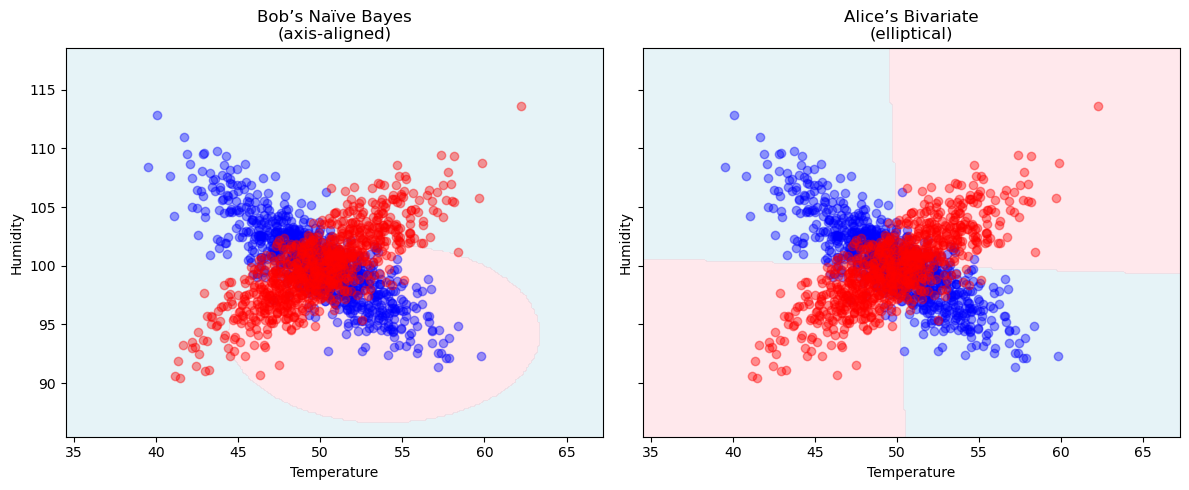

In [84]:
# 2) Grid-based Decision Boundaries
import matplotlib.pyplot as plt

X_train = train_set[:, :-1]
Y_train = train_set[:,  -1]
grid_x = np.linspace(X_train[:,0].min()-5, X_train[:,0].max()+5, 200)
grid_y = np.linspace(X_train[:,1].min()-5, X_train[:,1].max()+5, 200)
xx, yy = np.meshgrid(grid_x, grid_y)
pts = np.c_[xx.ravel(), yy.ravel()]

# Bob’s predictions
j0n = np.array([bob_cd0.get_instance_joint_prob(p) for p in pts])
j1n = np.array([bob_cd1.get_instance_joint_prob(p) for p in pts])
pred_naive = (j1n > j0n).reshape(xx.shape)

# Alice’s predictions
j0f = np.array([alice_cd0.get_instance_joint_prob(p) for p in pts])
j1f = np.array([alice_cd1.get_instance_joint_prob(p) for p in pts])
pred_full = (j1f > j0f).reshape(xx.shape)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True)
for ax, pred_grid, title in [
    (ax1, pred_naive, "Bob’s Naïve Bayes\n(axis-aligned)"),
    (ax2, pred_full,  "Alice’s Bivariate\n(elliptical)")
]:
    ax.contourf(xx, yy, pred_grid, levels=[-0.1,0.5,1.1],
                colors=['#ADD8E6','#FFB6C1'], alpha=0.3)
    ax.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1], c='blue',  alpha=0.4)
    ax.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1], c='red',   alpha=0.4)
    ax.set_title(title)
    ax.set_xlabel("Temperature"); ax.set_ylabel("Humidity")
plt.tight_layout()
plt.show()


### 3. Overall Test-Set Accuracy

Calculate and compare each model’s accuracy on the entire held-out test set.

Bob’s test accuracy:   0.495
Alice’s test accuracy: 0.797


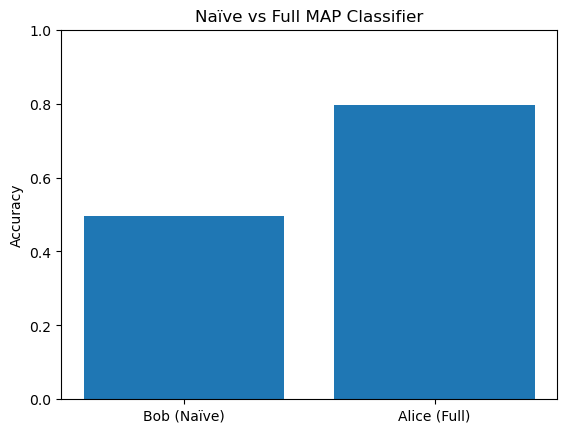

In [85]:
# 3) Accuracy on test set
acc_bob   = compute_accuracy(test_set, bob_clf)
acc_alice = compute_accuracy(test_set, alice_clf)
print(f"Bob’s test accuracy:   {acc_bob:.3f}")
print(f"Alice’s test accuracy: {acc_alice:.3f}")

# Bar chart
plt.bar(['Bob (Naïve)', 'Alice (Full)'], [acc_bob, acc_alice])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Naïve vs Full MAP Classifier")
plt.show()


## Conclusion: Why Bob Misclassified but Alice Got It Right

1. **Bob’s Naïve Bayes Prediction**  
   - Joint probabilities at **x_test** ≈ [43.04, 90.83]:  
     - P(Y=0, x) = 1.53 × 10⁻⁵  
     - P(Y=1, x) = 1.43 × 10⁻⁵  
   - Since P(Y=0,x) > P(Y=1,x), Bob’s classifier predicts **0**, although the true label is **1**.  
   - **Why?** Bob’s model multiplies two univariate Gaussians under the Naïve Bayes assumption:  
     $$
     f_{X_1, X_2 \mid Y}(x_1, x_2)
     \;=\;
     f_{X_1 \mid Y}(x_1)\,f_{X_2 \mid Y}(x_2).
     $$
     This ignores the real correlation between temperature and humidity, so similar marginals can produce misleading joint scores.

2. **Alice’s Bivariate MAP Prediction**  
   - Joint probabilities at **x_test**:  
     - P(Y=0, x) ≈ 7.4 × 10⁻¹⁸  
     - P(Y=1, x) ≈ 2.44 × 10⁻⁴  
   - Alice’s classifier uses the full 2-D Gaussian PDF, modeling the temperature–humidity covariance. That extra parameter tilts the density contours to match the actual data geometry, so P(Y=1,x) becomes vastly larger than P(Y=0,x), and she correctly predicts **1**.

3. **Held-Out Test Accuracy**  
   - **Bob’s** accuracy ≃ 0.495  
   - **Alice’s** accuracy ≃ 0.797  
   - This aligns with the empirical risk/accuracy measure from Model Evaluation:  
     $$
     \text{Accuracy} \;=\; 1 - R(c;D)
     \;=\;
     1 - \frac{1}{|D|}\sum_{(x,y)\in D} \mathbf{1}\{c(x)\neq y\}.
     $$
   - The much higher accuracy for Alice shows that modeling the covariance (quadratic decision boundary) substantially improves generalization, whereas Bob’s axis-aligned splits over-simplify the true 2-D distribution.

---

**Key Takeaways:**  
- **Conditional independence** is a strong assumption; when features are correlated, Naïve Bayes can mislead.  
- **Full covariance** (Gaussian Discriminant Analysis) recovers the right decision regions at the cost of \(O(p^2)\) parameters, but with enough data this pays off.  
- Always compare held-out accuracies (or empirical risks) to verify which model truly generalizes best.


## 6. A Discrete Naive Bayes Classifier (15 points)

In this task, we will train a breast cancer predictor on the Breast Cancer Dataset described [here](https://archive.ics.uci.edu/ml/datasets/breast+cancer).
The predictor will be based a naive Bayes classifier that uses *Laplace smoothing*.

We start by loading the train and test data:

In [86]:
# Load the train and test set into a pandas dataframe and convert them into a numpy array.
train_set = pd.read_csv('data/breast_trainset.csv').values
test_set = pd.read_csv('data/breast_testset.csv').values

Recall from the rectiation that the feature-specific class conditional probability in this model is estimated from the training data ($D$) using the formula

$$ \Pr[X_t=v | Y=j] = \frac{n_{t,v,j} + 1}{n_j + |V_t|}~,$$
where:
* $n_{t,v,j}= \{(x,y)\in D\ |\ x_t=v\ \wedge\ y=j\}$.
* $n_j = \{(x,y)\in D\ |\  y=j\}$.
* $V_t$ is the set of possible values for the $t$'th feature.

The likelihood is computed using 
$$ P(x| Y=j) = \prod\limits_{t=1}^{p}\Pr[X_t=x_t|Y=j]~. $$

The predicted class is obtained by the MAP rule:
$$\arg\!\max\limits_{j} \{\  \pi_j \cdot P(x | Y=j)\ \}~.$$


Implement the `DiscreteNBClassDistribution` class in `hw3.py`.

This class is similar to the `NaiveNormalClassDistribution` class, in that its constructor receives a dataset and a class label,
and it creates an object that can compute the joint probability of the specified class label with a given input ($x$).
In this class, this is done by estimating the feautre-specific discrete class conditional probabilities, as described above.

Similar to the `NaiveNormalClassDistribution` class, the class has three member functions,
`get_prior`, `get_instance_likelihood`, and `get_instance_joint_prob`,
which compute the various probabilities involved in classification of a given input sample.

The code below fits discrete class coniditonals to the two class labels using the training set.
It then uses these class conditionals to construct a `MAPClassifier` object and assess its accuracy on the test set.

In [87]:
from hw3 import DiscreteNBClassDistribution

# Build the a DiscreteNBClassDistribution for each class label
discrete_naive_CD_0 = DiscreteNBClassDistribution(train_set, 0)
discrete_naive_CD_1 = DiscreteNBClassDistribution(train_set, 1)

# Use these distributions to build a MAPClassifier and compute its accuracy
discrete_naive_classifier = MAPClassifier(discrete_naive_CD_0, discrete_naive_CD_1)
discrete_naive_accuracy = compute_accuracy(test_set, discrete_naive_classifier)
discrete_naive_accuracy

0.3508771929824561